In [116]:
import pandas as pd
import folium
import json
from matplotlib import pyplot as plt
import numpy as np
import random
import ipywidgets
import seaborn as sns
from folium import plugins
import geojson
from geojson import LineString, Point, Feature, FeatureCollection, dump
from geopy.geocoders import Nominatim

pkgdir = "C:/Users/Arion/Documents/Programação/Bases de Dados/Trabalho VED/"

with open(f"{pkgdir}brazil-states.geojson", encoding='utf-8') as f:
    topo_estados = geojson.load(f)

for track in topo_estados['features']:
    with open(track['properties']['name'][0] + '.geojson', 'a+') as f:
        dump(track, f, indent=2)

In [98]:
geoestados = pd.read_csv(f"{pkgdir}estados.csv", index_col="nome")
segpub = pd.read_csv(f"{pkgdir}segurancapub.csv")
hom = pd.read_csv(f"{pkgdir}homicidiosbrasil.csv")
colors = 

In [99]:
estados = []
for uf in segpub["UF"]:
    if not(uf in estados):
        estados.append(uf)

## Gerando o mapa

In [ ]:
m = folium.Map(location=[-14.19, -48.79], zoom_start=4)

## Adicionando marcadores ao mapa

In [ ]:
for uf in estados:
    folium.Marker(
        list(geoestados.loc[uf]["latitude":"longitude"]), popup=f"{uf}", tooltip="More Info",
        icon = folium.Icon(color="red", icon = "info-sign")
).add_to(m)

In [ ]:
seg15 = segpub[segpub["Ano"] == 2015]

In [ ]:
m.choropleth(
    geo_data = topo_estados,
    name = "Dados",
    data = seg15,
    columns=["UF","Ocorrências"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity="0.8",
    line_color="white",
    line_opacity="0.4",
    show=True,
    legend_name="Nolose"
)

In [ ]:
m

# Organizando os dados

In [ ]:
dfsanos = {}
for ano in segpub["Ano"]:
    if not(ano in dfsanos.keys()):
        dfsanos[ano] = segpub[segpub["Ano"] == ano]

dfscrimes_anos = {}
for ano in dfsanos:
    print(ano)
    dfscrimes_anos[ano] = {}
    for crime in dfsanos[ano]["Tipo Crime"]:
        if not(crime in dfscrimes_anos[ano].keys()):
            print(crime)
            dfscrimes_anos[ano][crime] = dfsanos[ano][dfsanos[ano]["Tipo Crime"] == crime]



In [ ]:
dfscrimes_anos[2020]["Estupro"]

In [ ]:
for ano in dfscrimes_anos:
    for crime in dfscrimes_anos[ano]:
        print(dfscrimes_anos[ano][crime])

# Adicionando controle de dados

In [102]:
select_ano = ipywidgets.Select(
    options=list(dfscrimes_anos.keys()),
    value=2020,
    description="Ano",
    disabled=False
)
select_crime = ipywidgets.Select(
    options=list(dfscrimes_anos[2015].keys()),
    value="Estupro",
    description="Crime",
    disabled=False
)

def select(year, crime):
    for ano in dfscrimes_anos:
        if year == ano:
            m = folium.Map(location=[-14.19, -48.79], zoom_start=4)
            m.choropleth(
                geo_data = topo_estados,
                name = "Dados",
                data = dfscrimes_anos[ano][crime],
                columns=["UF","Ocorrências"],
                key_on="feature.properties.name",
                fill_color="Reds",
                fill_opacity="0.7",
                line_color="white",
                line_opacity="0.8",
                show=True,
                legend_name="Nolose"
            )
            for uf in estados:
                folium.Marker(
                    list(geoestados.loc[uf]["latitude":"longitude"]), popup=f"{uf}", tooltip="More Info",
                    icon = folium.Icon(color="red", icon = "info-sign")
            ).add_to(m)
            plugins.Fullscreen(position='topleft').add_to(m)
            display(m)


ipywidgets.interact(select, year=select_ano, crime=select_crime)

interactive(children=(Select(description='Ano', index=1, options=(2021, 2020, 2019, 2018, 2017, 2016, 2015), v…

<function __main__.select(year, crime)>

In [109]:
for ano in dfscrimes_anos:
    for crime in dfscrimes_anos[ano]:
        print(dfscrimes_anos[ano][crime][dfscrimes_anos[ano][crime]["UF"] == "Acre"])

     UF Tipo Crime   Ano      Mês  Ocorrências
0  Acre    Estupro  2021  janeiro           39
     UF        Tipo Crime   Ano        Mês  Ocorrências
1  Acre  Furto de veículo  2021    janeiro           55
9  Acre  Furto de veículo  2021  fevereiro           45
     UF        Tipo Crime   Ano      Mês  Ocorrências
2  Acre  Homicídio doloso  2021  janeiro           14
     UF                       Tipo Crime   Ano      Mês  Ocorrências
3  Acre  Lesão corporal seguida de morte  2021  janeiro            0
     UF                      Tipo Crime   Ano      Mês  Ocorrências
4  Acre  Roubo a instituição financeira  2021  janeiro            0
      UF      Tipo Crime   Ano        Mês  Ocorrências
5   Acre  Roubo de carga  2021    janeiro            0
10  Acre  Roubo de carga  2021  fevereiro           88
     UF        Tipo Crime   Ano      Mês  Ocorrências
6  Acre  Roubo de veículo  2021  janeiro           99
     UF                           Tipo Crime   Ano      Mês  Ocorrências
7  Acre  R

<AxesSubplot:xlabel='Mês', ylabel='Ocorrências'>

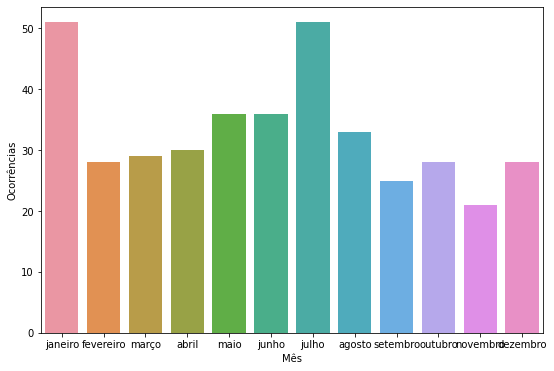

In [119]:
fig = plt.figure(figsize=(9,6))
sns.barplot(data=dfscrimes_anos[2018]["Homicídio doloso"][dfscrimes_anos[2018]["Homicídio doloso"]["UF"] == "Acre"],
        x="Mês",
        y="Ocorrências",
        palette=colors)

In [114]:
dfscrimes_anos[2018]["Homicídio doloso"][dfscrimes_anos[2018]["Homicídio doloso"]["UF"] == "Acre"]

,UF,Tipo Crime,Ano,Mês,Ocorrências
6229,Acre,Homicídio doloso,2018,janeiro,51
6238,Acre,Homicídio doloso,2018,fevereiro,28
6247,Acre,Homicídio doloso,2018,março,29
6256,Acre,Homicídio doloso,2018,abril,30
6265,Acre,Homicídio doloso,2018,maio,36
6274,Acre,Homicídio doloso,2018,junho,36
6283,Acre,Homicídio doloso,2018,julho,51
6292,Acre,Homicídio doloso,2018,agosto,33
6301,Acre,Homicídio doloso,2018,setembro,25
6310,Acre,Homicídio doloso,2018,outubro,28
